In [2]:
import networkx as nx
import numpy as np
import random as rnd
from pylab import *
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [257]:
def build_draw_graph(graph, labels=None, graph_layout='spring',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):
    
    rcParams['figure.figsize'] = 12, 12  # that's default image size for this interactive session
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    print G.number_of_nodes(), G.number_of_edges()
    

    # these are different layouts for the network 
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=partition.values())
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    # show graph
    plt.show()
    return G

In [4]:
def adjacency_to_graph(adjacency):
    graph = []
    x = np.argwhere(adjacency !=0)
    for i in range(x.shape[0]):
        if (x[i][1],x[i][0]) not in graph :#to remove redundancy
            graph.append(tuple(x[i]))
    return graph

In [ ]:
def adjacency_unweight(edge_weights_file):
    
    f = open(edge_weights_file,"r")
    n =0
    for line in f:
        s, d, w = [int(i) for i in line.strip().split()]
        n = max(n,max(s,d))
    matrix = np.zeros((n+1,n+1))
    
    f = open(edge_weights_file,"r")
    for line in f:
        s, d, w = [int(i) for i in line.strip().split()]
        matrix[s][d] = 1
    return matrix

In [ ]:
def check_symmetric(Lp, tol=1e-8):
    a = Lp.todense()
    return np.allclose(a, a.T, atol=tol)

In [ ]:
def get_vectors(laplacian, k):
    X=[]
    v = np.zeros((len(laplacian), k))
    #w:eigen values
    #vx:eigen vectors
    w,vx=np.linalg.eig(laplacian)
    
    #ordering the eigen values
    order = w.argsort()
    icr_w=order.argsort()
    icr_w=np.array(icr_w)
    for i in range(vx.shape[1]):
        X.append(vx[:,i])
    X=np.array(X)
    
    #ordering the eigen vectors in incresing order 
    #correspoding to eigen values
    sorted_columns_v= [j for _,j in sorted(zip(icr_w,X))]
    
    #choosing  eigenvectors corresponding to the lowest  k
    #eigenvalues of  L
    for i in range(v.shape[1]):
        v[:,i]=sorted_columns_v[i]
        
    return v

In [ ]:
def kmeans(v,k):
    labels = np.zeros(len(v))
    kmeans=KMeans(n_clusters=k, random_state=0).fit(v)
    labels=kmeans.labels_
    #print len(labels)
    return labels

In [ ]:
# generate simple graph to check algorithm
import itertools
comb=itertools.combinations(range(5),2)
print list(comb)
def G(n, p):
    '''
    output a graph by its adjacency matrix
    '''
    #possible combination of vertices to form and edge in an graph
    cmb=itertools.combinations(range(n),2)
    comb=list(cmb)
    graph = np.zeros((n, n))
    #randomly create an edge between them with probability  p
    edges=rnd.sample(comb,int(p*len(comb)))
    for i in edges:
        #assigning value 1 correspondinf to vertices i,j if they form an edge
        graph[i[0]][i[1]]=1
        graph[i[1]][i[0]]=1
    return graph
range(1,5)

In [ ]:
# generate simple graph to check algorithm
def SBM(n, k, p, q):
    '''
    output a graph by a list of edge tuples

    '''
    assert (n % k == 0)
    graph = np.zeros((n, n))
    sub_graph=[]
    inter_edge=[]

    for i in range(k):
        #generating intra graph communities by using Erdős-Rényi Graphs
        graph_cluster=adjacency_to_graph(G(int(n/k), p))
        for g in graph_cluster:
            g=list(g)
            x=g[0]+(n/k*i)
            y=g[1]+(n/k*i)
            graph[int(x)][int(y)]=1
            graph[int(y)][int(x)]=1
        sub_graph.append(range(int(n/k*i),int((n/k*i)+n/k)))
        #print adjacency_to_graph(graph)
   
    #Assigning the inter graph communities edges
    choose_clusters=itertools.combinations(sub_graph,2)
    for pairs in choose_clusters:
        c=[]
        a = pairs[0]
        b = pairs[1]
        c = list(itertools.product(a, b))
        inter_edge+=c  
    inter_edges=rnd.sample(inter_edge,int(q*len(inter_edge)))
    for j in inter_edges:
            graph[j[0]][j[1]]=1
            graph[j[1]][j[0]]=1
    return graph

In [ ]:
# use eigenvalues to select k
def selectK(G):
    A = nx.adjacency_matrix(G)
    Lp = nx.laplacian_matrix(G)
    value,vector=np.linalg.eig(Lp.A)
    diff = np.abs([x-value[i-1] for i,x in enumerate(value)][1:18])
    print diff
    
#     plt.plot(value[:18],marker = "*",color = 'b')
#     plt.show()
    return value

In [ ]:
# use eigenvectors to select k
from find_cluster import get_rotation_matrix
from itertools import groupby
from scipy.linalg import eigh, inv, sqrtm

In [ ]:
# use eigenvectors to select k
def get_min_max(w, min_n_cluster, max_n_cluster):
    if min_n_cluster is None:
        min_n_cluster = 2
    if max_n_cluster is None:
        max_n_cluster = np.sum(w > 0)
        if max_n_cluster < 2:
            max_n_cluster = 2
    if min_n_cluster > max_n_cluster:
        raise ValueError('min_n_cluster should be smaller than max_n_cluster')
    return min_n_cluster, max_n_cluster

In [ ]:
# use eigenvectors to select k
def reformat_result(cluster_labels, n):
    zipped_data = zip(cluster_labels, range(n))
    zipped_data = sorted(zipped_data, key=lambda x: x[0])
    grouped_feature_id = [[j[1] for j in i[1]] for i in groupby(zipped_data, lambda x: x[0])]
    return grouped_feature_id

In [ ]:
# use eigenvectors to select k
def self_tuning_spectral_clustering(G, get_rotation_matrix, min_n_cluster=None, max_n_cluster=None):
    A = nx.adjacency_matrix(G)
    Lp = nx.laplacian_matrix(G)
    w,v =np.linalg.eig(Lp.A)
    
    min_n_cluster, max_n_cluster = get_min_max(w, min_n_cluster, max_n_cluster)
    re = []
    for c in range(min_n_cluster, max_n_cluster + 1):
        x = v[:, -c:]
        cost, r = get_rotation_matrix(x, c)
        re.append((cost, x.dot(r)))
        print('n_cluster: %d \t cost: %f' % (c, cost))
    COST, Z = sorted(re, key=lambda x: x[0])[0]
    return reformat_result(np.argmax(Z, axis=1), Z.shape[0])

In [ ]:
G = build_draw_graph(graph,graph_layout='shell')

In [41]:
# can't use this matrix directly since it contains disconnected nodes
print matrix.shape

(510, 510)


In [192]:
edge_weights_file = "data/investor_network_undirected_weights.txt"
matrix = adjacency_unweight(edge_weights_file)
graph = adjacency_to_graph(matrix)

In [267]:
A = nx.adjacency_matrix(G)
print A.shape

(439, 439)


In [268]:
Lp = nx.laplacian_matrix(G)
print Lp.diagonal()

[159 141  97 137 134 111   7  58  80  97 111  67  56 101   3  60  24  55
  22  49  89  62  75  61  58  80  46  41  21  60  45  53  46  65  53  34
  19  41  29  57  26  45  24  66  43  36  11  40  22  37  27   7  36  25
  26  58  21  23  25  38  25  37  32  43  34  17  30  17  31  18  32  10
  26  21   4  13   1  23  26  28   8  13   6  25  33  26  17  12   9  19
   8  17  11  23  20   4  13  32   8   3  10  38  28  27  34  15  21  15
  23  11  16  11  26  27  17   5  27  10  10  16  19   3  13   1  15  16
  36  19   2   2  16  17  25  18  17   4  15  26  13   6  15   9   4   9
   8  27  15   6  10   7   8   7  15  24  15  22   4  10  20  16  15   9
  14   2  23  19  13  14   4   3   5   4  10  10   3  11  14   8   2   2
   2  14  10   4   9  20   1  10   3   7  13   9   8  12   2  10   4  12
   9   6   5   6   7  11  15   8   3   3  18  17   4   6   5   2   6   8
   9   5   5   7  17  11   7   7  10   8  13  10   4   1   1   4  11   2
   5  11   5  12  11   8  10   3  11  18   7   4   

In [17]:
check_symmetric(Lp)

True

In [18]:
eN = np.linalg.eigvals(Lp.A)
print np.all(eN)>0

True


In [44]:
w,vx=np.linalg.eig(Lp.A)
print (float)(min(w))

-1.43871747571e-14


/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [218]:
with open("Spectral Clustering Result.txt",'w') as file:
    with open("data/investor_list.txt",'r') as f1:
        for v in com_list:
            file.write("***********************************************************"+'\n')
            file.write("community %d has %d nodes"% (v,len(com_list[v])) + '\n')
            for idx in com_list[v]: 
                f1.seek(0)
                file.write(str(idx) +' '+ str(f1.readlines()[idx]))

18 55


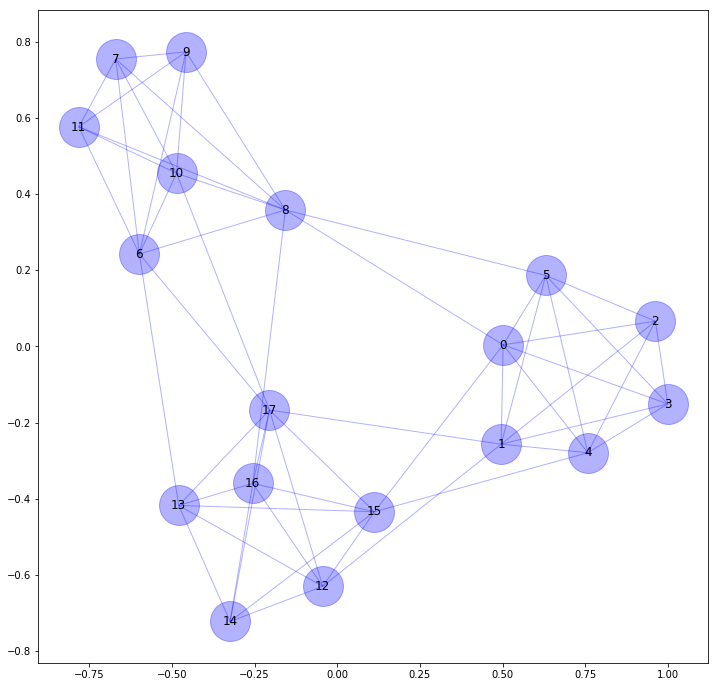

In [85]:
graph = adjacency_to_graph(SBM(18, 3, 1, 0.1))
G_3 = build_draw_graph(graph)

In [432]:
clustering_4 = SpectralClustering(n_clusters=4,
             assign_labels="discretize",random_state=0).fit(A)

In [434]:
result = clustering.labels_
print result

# result_orig_idx = {}
# for new, c in enumerate(result):
#     old = new_old_idx_arr[new]
#     result_orig_idx[old] = c
# print result_orig_idx

[7 7 4 7 1 7 7 4 4 3 1 4 4 1 0 1 0 5 0 1 4 1 1 4 2 4 4 4 0 1 1 4 0 4 4 0 0
 4 0 1 0 4 4 1 0 4 0 0 0 0 9 0 1 5 7 4 2 0 0 1 0 1 4 4 4 0 4 0 0 0 0 0 5 4
 0 0 0 1 0 1 0 0 0 0 1 1 0 7 0 0 0 0 0 7 0 0 8 0 0 0 0 4 7 4 1 0 7 7 0 4 0
 0 1 4 0 0 4 0 0 0 2 0 0 0 4 7 4 0 0 0 5 4 0 1 0 0 7 4 0 0 0 0 0 0 0 4 7 0
 0 7 0 0 0 2 0 0 0 0 4 0 0 7 0 0 4 6 7 9 0 0 0 0 7 7 0 0 4 0 0 0 0 5 0 7 7
 7 0 0 0 0 0 0 7 7 0 0 0 0 0 7 0 0 7 4 0 0 0 0 7 1 0 0 0 0 0 0 6 0 0 0 1 0
 0 7 0 7 0 0 0 0 0 0 7 0 7 7 0 7 2 7 0 0 0 4 0 0 0 0 0 0 0 2 0 0 4 0 7 0 7
 0 7 0 0 0 7 0 0 0 7 7 0 6 0 0 3 0 2 0 0 0 0 0 0 3 0 4 0 8 9 0 0 0 0 0 0 0
 5 0 0 0 0 0 0 0 0 0 7 0 4 0 7 7 0 9 0 0 0 9 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0
 0 7 0 0 0 0 0 0 5 0 0 0 7 0 0 0 0 0 7 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 6 0
 0 0 0 7 0 0 0 0 6 0 0 7 0 0 7 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 7 0 0 0
 7 0 0 0 0 0 0 8 0 7 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 7 0 0 0 8 0]


In [429]:
clustering = SpectralClustering(n_clusters=10,
             assign_labels="discretize",random_state=0).fit(A)

In [328]:
result = clustering.labels_
print result

result_orig_idx = {}
for new, c in enumerate(result):
    old = new_old_idx_arr[new]
    result_orig_idx[old] = c
print result_orig_idx

[7 7 4 7 1 7 7 4 4 3 1 4 4 1 0 1 0 5 0 1 4 1 1 4 2 4 4 4 0 1 1 4 0 4 4 0 0
 4 0 1 0 4 4 1 0 4 0 0 0 0 9 0 1 5 7 4 2 0 0 1 0 1 4 4 4 0 4 0 0 0 0 0 5 4
 0 0 0 1 0 1 0 0 0 0 1 1 0 7 0 0 0 0 0 7 0 0 8 0 0 0 0 4 7 4 1 0 7 7 0 4 0
 0 1 4 0 0 4 0 0 0 2 0 0 0 4 7 4 0 0 0 5 4 0 1 0 0 7 4 0 0 0 0 0 0 0 4 7 0
 0 7 0 0 0 2 0 0 0 0 4 0 0 7 0 0 4 6 7 9 0 0 0 0 7 7 0 0 4 0 0 0 0 5 0 7 7
 7 0 0 0 0 0 0 7 7 0 0 0 0 0 7 0 0 7 4 0 0 0 0 7 1 0 0 0 0 0 0 6 0 0 0 1 0
 0 7 0 7 0 0 0 0 0 0 7 0 7 7 0 7 2 7 0 0 0 4 0 0 0 0 0 0 0 2 0 0 4 0 7 0 7
 0 7 0 0 0 7 0 0 0 7 7 0 6 0 0 3 0 2 0 0 0 0 0 0 3 0 4 0 8 9 0 0 0 0 0 0 0
 5 0 0 0 0 0 0 0 0 0 7 0 4 0 7 7 0 9 0 0 0 9 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0
 0 7 0 0 0 0 0 0 5 0 0 0 7 0 0 0 0 0 7 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 6 0
 0 0 0 7 0 0 0 0 6 0 0 7 0 0 7 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 7 0 0 0
 7 0 0 0 0 0 0 8 0 7 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 7 0 0 0 8 0]
{0: 7, 1: 7, 2: 4, 3: 7, 4: 1, 5: 7, 6: 7, 7: 4, 8: 4, 9: 3, 10: 1, 11: 4, 12: 4, 13: 1, 14: 0, 15: 1, 16: 0,

In [342]:
result_community = {}
for k,v in result_orig_idx.iteritems():
    if v not in result_community:
        result_community[v] = []
    result_community[v].append(k)
print result_community  

{0: [14, 16, 18, 28, 32, 35, 36, 38, 40, 44, 46, 47, 48, 49, 51, 57, 58, 60, 65, 67, 68, 69, 70, 71, 74, 75, 76, 78, 80, 81, 82, 83, 86, 88, 89, 90, 91, 92, 94, 95, 97, 98, 99, 100, 105, 108, 111, 112, 115, 116, 118, 119, 120, 122, 123, 124, 128, 129, 130, 133, 135, 136, 139, 140, 141, 142, 143, 144, 145, 148, 149, 151, 152, 153, 155, 156, 157, 158, 160, 161, 163, 164, 169, 170, 171, 172, 175, 176, 178, 179, 180, 181, 184, 188, 189, 190, 191, 192, 193, 196, 197, 198, 200, 201, 204, 205, 208, 209, 210, 211, 214, 215, 216, 218, 219, 220, 222, 223, 224, 227, 228, 231, 233, 234, 235, 236, 238, 239, 241, 247, 251, 252, 253, 255, 257, 258, 259, 260, 261, 262, 264, 267, 269, 272, 274, 276, 277, 278, 280, 282, 283, 286, 288, 290, 292, 294, 295, 296, 297, 299, 300, 302, 304, 309, 312, 313, 314, 315, 316, 317, 320, 322, 323, 325, 326, 327, 328, 329, 330, 332, 335, 339, 341, 342, 343, 345, 348, 349, 350, 351, 353, 355, 356, 357, 358, 359, 361, 362, 365, 368, 370, 372, 373, 376, 377, 379, 380, 381

In [343]:
for v in result_community:
    print "community %d has %d nodes"% (v,len(result_community[v]))

community 0 has 286 nodes
community 1 has 23 nodes
community 2 has 7 nodes
community 3 has 3 nodes
community 4 has 43 nodes
community 5 has 7 nodes
community 6 has 5 nodes
community 7 has 56 nodes
community 8 has 4 nodes
community 9 has 5 nodes


In [344]:
with open("Spectral Clustering Result 2.txt",'w') as file:
    with open("data/investor_list.txt",'r') as f1:
        for v in com_list:
            file.write("***********************************************************"+'\n')
            file.write("community %d has %d nodes"% (v,len(com_list[v])) + '\n')
            for idx in com_list[v]: 
                f1.seek(0)
                file.write(str(idx) +' '+ str(f1.readlines()[idx]))

In [385]:
selectK(G)

[17.94778172  4.00060095  3.12647424 23.18168075  0.68264181 10.24676268
  3.66355673  1.03654078  7.42073691  9.48181786  1.1313231   5.61733744
  7.51009169  1.04962796  1.57246877  2.57507932  0.84531987]


array([ 1.60067178e+02+0.00000000e+00j,  1.42119396e+02+0.00000000e+00j,
        1.38118795e+02+0.00000000e+00j,  1.34992321e+02+0.00000000e+00j,
        1.11810640e+02+0.00000000e+00j,  1.12493282e+02+0.00000000e+00j,
        1.02246519e+02+0.00000000e+00j,  9.85829624e+01+0.00000000e+00j,
        9.75464217e+01+0.00000000e+00j,  9.01256847e+01+0.00000000e+00j,
        8.06438669e+01+0.00000000e+00j,  8.17751900e+01+0.00000000e+00j,
        7.61578526e+01+0.00000000e+00j,  6.86477609e+01+0.00000000e+00j,
        6.75981329e+01+0.00000000e+00j,  6.60256641e+01+0.00000000e+00j,
        6.34505848e+01+0.00000000e+00j,  6.26052650e+01+0.00000000e+00j,
        6.15084276e+01+0.00000000e+00j,  6.14026432e+01+0.00000000e+00j,
        5.97067710e+01+0.00000000e+00j,  5.87996486e+01+0.00000000e+00j,
        5.85197424e+01+0.00000000e+00j,  5.79600987e+01+0.00000000e+00j,
        5.65696179e+01+0.00000000e+00j,  5.56926229e+01+0.00000000e+00j,
        5.37633452e+01+0.00000000e+00j,  5.27875925

In [426]:
# draw k selection
def draw(data1,data2):
    t1 = np.arange(2,18,1)
    t2 = np.arange(2,18,1)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters k')
    ax1.set_ylabel('Eigenvalues', color=color)
    ax1.plot(t1, data1, marker = "*", color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    disk1 = plt.Circle((t1[2], data1[2]), 0.3, color='k', fill=False)
    ax1.add_artist(disk1)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Cost Function', color=color)  # we already handled the x-label with ax1
    ax2.plot(t2, data2, marker = "*",color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    disk2 = plt.Circle((t2[2], data2[2]), 0.3, color='k', fill=False)
    ax2.add_artist(disk2)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("Select Number of Clusters")
    plt.savefig('select_number_of_clusters.png')
    fig_size= 7,7
    plt.rcParams["figure.figsize"] = fig_size
    print plt.rcParams["figure.figsize"]
    plt.show()

[17.94778172  4.00060095  3.12647424 23.18168075  0.68264181 10.24676268
  3.66355673  1.03654078  7.42073691  9.48181786  1.1313231   5.61733744
  7.51009169  1.04962796  1.57246877  2.57507932  0.84531987]
[7.0, 7.0]


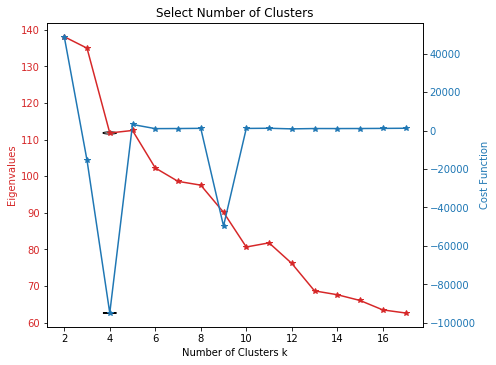

In [427]:
data1 = selectK(G)[2:18]
data2 = k_value
draw(data1,data2)

In [ ]:
self_tuning_spectral_clustering(G, get_rotation_matrix, min_n_cluster=None, max_n_cluster=20)

In [89]:
V3 = get_vectors(L3.A,3)

In [113]:
w3,vx3=np.linalg.eig(L3.A)
print np.count_nonzero(vx3)

324


In [114]:
order = w3.argsort()
print order
print w3[0],w3[1]

[ 0  1  2 15 14 16 17 13 12 11 10  9  8  7  6  5  4  3]
-1.6653345369377348e-15 0.9538768408175348


In [116]:
print vx3[1]

[ 0.23570226  0.23644508  0.07672322 -0.19448473 -0.38964036  0.07864838
  0.41282993  0.49733999  0.02206659 -0.13694318 -0.08244719  0.35434787
 -0.19076117 -0.14714118 -0.11565743  0.19725665 -0.04696776 -0.09369845]


In [117]:
x = []
y = []
for i, v in enumerate(sorted(vx3[1])):
    x.append(i)
    y.append(v)

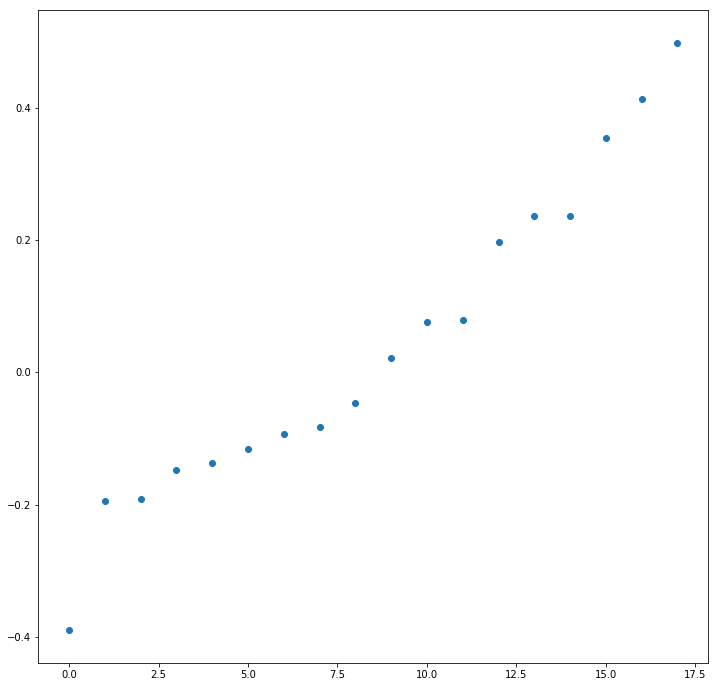

In [118]:
plt.scatter(x,y)

In [ ]:
# def get_laplacian(adjacency):
#     '''
#     return the Laplacian.
#     '''
#     laplacian = np.zeros(adjacency.shape)
#     laplacian=(-1)*adjacency
#     for i in range(adjacency.shape[0]):
#         degree=list(adjacency[i]).count(1)
#         #print degree
#         laplacian[i][i]=degree
#     return laplacian

In [ ]:
# lap2 = get_laplacian(matrix)
# print lap2.diagonal()

In [63]:
test = np.array([[3,-1,-1,0,-1,0],
                 [-1,2,-1,0,0,0],
                 [-1,-1,3,-1,0,0],
                 [0,0,-1,3,-1,-1],
                 [-1,0,0,-1,3,-1],
                 [0,0,0,-1,-1,2]])

In [104]:
w_test,vx_test=np.linalg.eig(test)

In [106]:
print w_test[0],w_test[1]

8.881784197001252e-16 0.9999999999999987


In [110]:
print vx_test[1]

[-4.08248290e-01 -5.77350269e-01  7.76394588e-16  4.08248290e-01
 -2.88675135e-01  5.38063715e-01]


In [107]:
x = []
y = []
for i, v in enumerate(sorted(vx_test[1])):
    x.append(i)
    y.append(v)

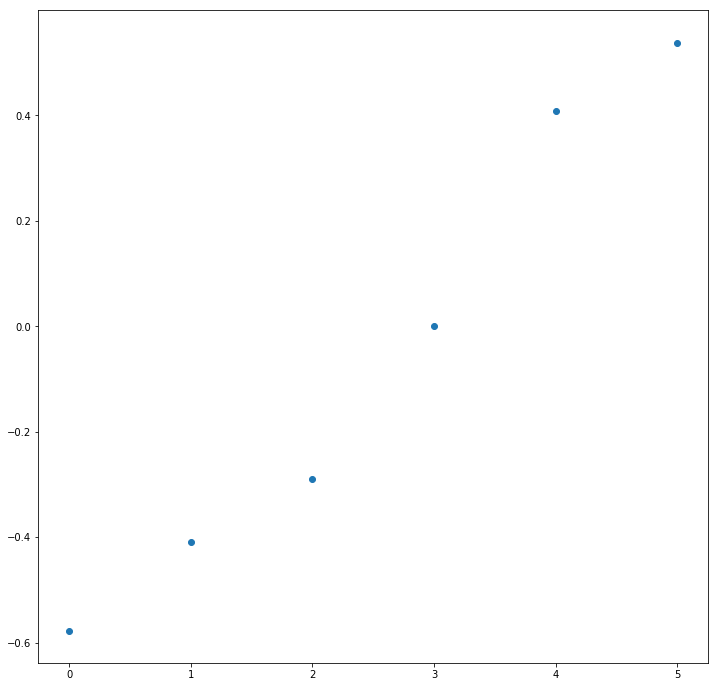

In [108]:
plt.scatter(x,y)

In [ ]:
w,vx=np.linalg.eig(Lp.A)
print np.count_nonzero(vx)
order = w.argsort()
#print order


In [349]:
x = []
y = []
for i, v in enumerate(sorted(vx[190])):
    x.append(i)
    y.append(v)

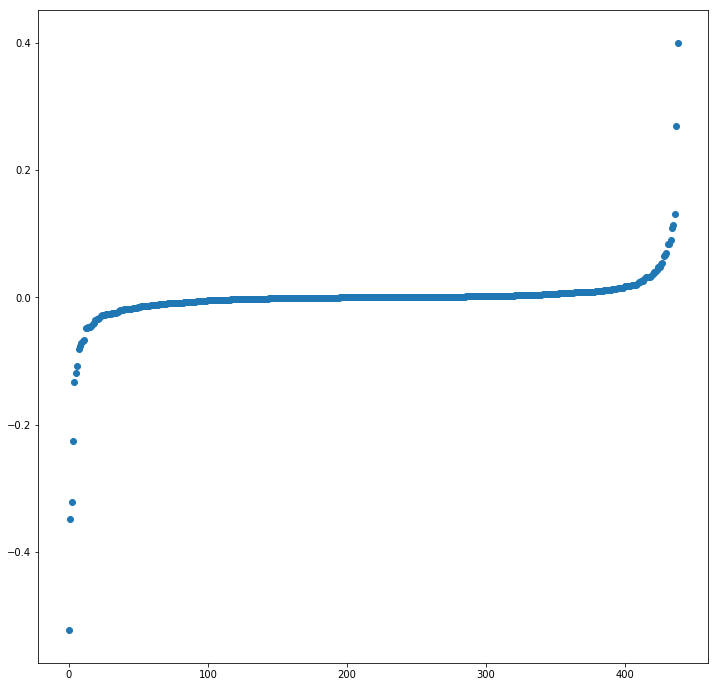

In [358]:
# The second eigenvectors, weird result
plt.scatter(x,y)
#plt.yscale('log')
# plt.ylim(top=0.5)#, bottom=-0.5)

In [248]:
import community_layout as layout

In [265]:
partition = {}
for i,v in enumerate(result):
    partition[i] = v

In [329]:
pos = layout.community_layout(G, result_orig_idx)

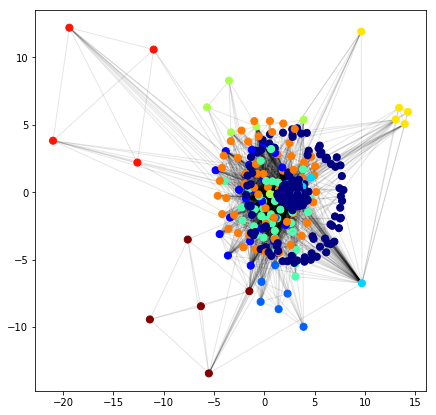

In [435]:
# draw community
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=list(result_orig_idx.values()), cmap = plt.get_cmap('jet'))
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.savefig('spectral_cluster.png')
plt.show()

In [325]:
# map original nodes and graph nodes(without disconnected nodes)
node_list_file = "data/investor_list.txt"
edge_weights_file = "data/investor_network_undirected_weights.txt"
f = open(edge_weights_file, "r")
se = set()
for line in f:
    s,d,w = [int(i) for i in line.strip().split()]
    se.add(s)
    se.add(d)
new_old_idx_arr = sorted(list(se))
old_new_idx_dict = {}
for new,old in enumerate(new_old_idx_arr):
    old_new_idx_dict[old] = new

l = len(new_old_idx_map)
a_matrix = np.zeros((l,l))
f = open(edge_weights_file,"r")
for line in f:
    s, d, w = [int(i) for i in line.strip().split()]
    a_matrix[old_new_idx_dict[s]][old_new_idx_dict[d]] = 1
print a_matrix.shape

print np.sum(A == a_matrix)==439**2

(439, 439)
True
